In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import HTML

from collab2.foraging.toolkit import (
    animate_predictors,
    dataObject,
    generate_local_windows,
    generate_pairwiseCopying,
    generate_vicsek,
    rescale_to_grid,
    subsample_frames_constant_frame_rate,
)

mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

# Create `dataObject` with test data from experiments 

In [2]:
# load data

fish_data = pd.read_csv("4wpf_test.csv")
gridMin = 0
gridMax = 300
grid_size = 50
fps = 121

# scaling and subsampling
fishDF_scaled = rescale_to_grid(
    fish_data, size=grid_size, gridMin=gridMin, gridMax=gridMax
)
fishDF_scaled_subsampled = subsample_frames_constant_frame_rate(
    fishDF_scaled, frame_spacing=60, fps=fps
)

# create a test foragers object with chosen number of frames
num_frames = 20
foragers_object = dataObject(
    fishDF_scaled_subsampled.loc[fishDF_scaled_subsampled["time"] < num_frames],
    grid_size=grid_size,
)

# choose local windows params, and compute
local_windows_kwargs = {
    "window_size": grid_size / 2,
    "sampling_fraction": 1,
    "skip_incomplete_frames": True,
}

foragers_object.local_windows_kwargs = local_windows_kwargs
local_windows = generate_local_windows(foragers_object)
foragers_object.local_windows = local_windows

original_frames: 18739
original_shape: (74956, 5)
resulting_frames: 313
resulting_shape: (1252, 5)
new frame-rate =  2.02


/Users/Admin/Repositories/collab-creatures/collab2/foraging/toolkit/utils.py:36: UserWarning:  Nan values in data.
                Specify handling of missing data using `skip_incomplete_frames` argument to `generate_all_predictors`
  warnings.warn(


# Vicsek predictor

/Users/Admin/Repositories/collab-creatures/collab2/foraging/toolkit/velocity.py:181: UserWarning: Dropped 7/76 instances from vicsek predictor calculation
            due to invalid velocity values
  warnings.warn(
/Users/Admin/Repositories/collab-creatures/collab2/foraging/toolkit/visualization.py:135: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
2024-08-26 13:37:37,153 - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


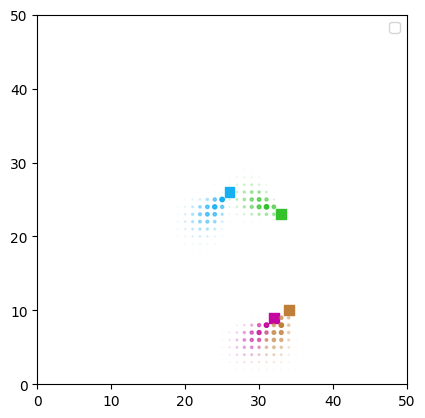

In [3]:
# choose predictor kwargs and add to object
predictor_kwargs = {
    "vicsek": {
        "interaction_length": grid_size / 3,
        "interaction_constraint": None,
        "interaction_constraint_params": None,
        "dt": 1,
        "sigma_v": 3,
        "sigma_t": 0.3,
    }
}

foragers_object.predictor_kwargs = predictor_kwargs
vicsek_predictor = generate_vicsek(foragers_object, "vicsek")

ani = animate_predictors(
    foragers_object.foragersDF,
    vicsek_predictor,
    predictorID="vicsek",
    forager_index=[0, 1, 2, 3],
    grid_size=grid_size,
    random_state=10,
    size_multiplier=10,
)
HTML(ani.to_jshtml())

# How correlated are vicsek & pairwiseCopying predictors? 

In [4]:
# create dataObject with all the frames
fish_data = pd.read_csv("4wpf_test.csv")
gridMin = 0
gridMax = 300
grid_size = 50
fps = 121

# scaling and subsampling
fishDF_scaled = rescale_to_grid(
    fish_data, size=grid_size, gridMin=gridMin, gridMax=gridMax
)
fishDF_scaled_subsampled = subsample_frames_constant_frame_rate(
    fishDF_scaled, frame_spacing=60, fps=fps
)

# create a test foragers object with all frames
foragers_object = dataObject(
    fishDF_scaled_subsampled,
    grid_size=grid_size,
)

# choose local windows params, and compute
local_windows_kwargs = {
    "window_size": grid_size / 2,
    "sampling_fraction": 1,
    "skip_incomplete_frames": True,
}

foragers_object.local_windows_kwargs = local_windows_kwargs
local_windows = generate_local_windows(foragers_object)
foragers_object.local_windows = local_windows

# choose predictor kwargs and add to object
predictor_kwargs = {
    "vicsek": {
        "interaction_length": grid_size / 3,
        "interaction_constraint": None,
        "interaction_constraint_params": None,
        "dt": 1,
        "sigma_v": 3,
        "sigma_t": 0.3,
    },
    "pairwiseCopying": {
        "interaction_length": grid_size / 3,
        "interaction_constraint": None,
        "interaction_constraint_params": None,
        "dt": 1,
        "sigma_v": 3,
        "sigma_t": 0.3,
    },
}

foragers_object.predictor_kwargs = predictor_kwargs

original_frames: 18739
original_shape: (74956, 5)
resulting_frames: 313
resulting_shape: (1252, 5)
new frame-rate =  2.02


/Users/Admin/Repositories/collab-creatures/collab2/foraging/toolkit/utils.py:36: UserWarning:  Nan values in data.
                Specify handling of missing data using `skip_incomplete_frames` argument to `generate_all_predictors`
  warnings.warn(


In [5]:
vicsek_predictor = generate_vicsek(foragers_object, "vicsek")
pairwiseCopying_predictor = generate_pairwiseCopying(foragers_object, "pairwiseCopying")

/Users/Admin/Repositories/collab-creatures/collab2/foraging/toolkit/velocity.py:181: UserWarning: Dropped 7/1248 instances from vicsek predictor calculation
            due to invalid velocity values
  warnings.warn(
/Users/Admin/Repositories/collab-creatures/collab2/foraging/toolkit/velocity.py:31: UserWarning: Using existing velocity data.
                Delete corresponding columns from foragersDF to re-calculate velocity values.
  warnings.warn(
/Users/Admin/Repositories/collab-creatures/collab2/foraging/toolkit/velocity.py:181: UserWarning: Dropped 7/1248 instances from pairwiseCopying predictor calculation
            due to invalid velocity values
  warnings.warn(


In [6]:
# convert to DFs
vicsek_predictorDF = pd.concat([pd.concat(dfs) for dfs in vicsek_predictor])
pairwiseCopying_predictorDF = pd.concat(
    [pd.concat(dfs) for dfs in pairwiseCopying_predictor]
)

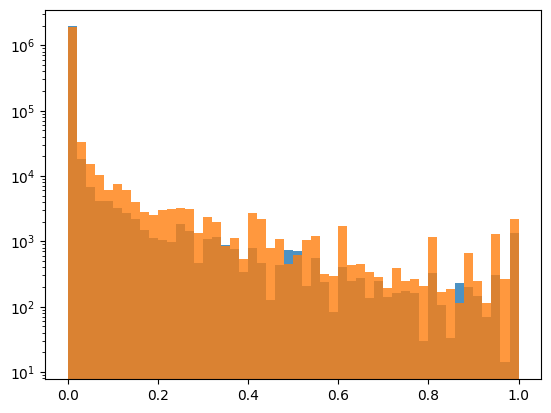

In [12]:
plt.hist(vicsek_predictorDF["vicsek"], bins=50, alpha=0.8)
plt.hist(pairwiseCopying_predictorDF["pairwiseCopying"], bins=50, alpha=0.8)
plt.yscale("log")
plt.show()

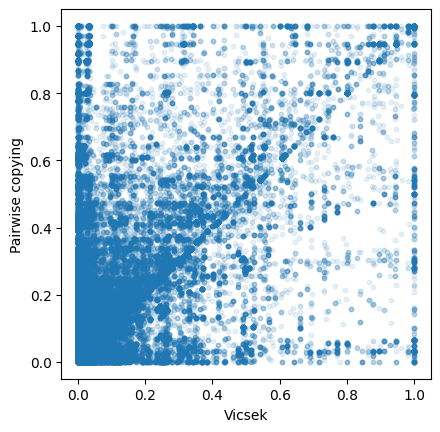

In [15]:
# mpl.use('Agg')
fig, ax = plt.subplots()
ax.scatter(
    vicsek_predictorDF["vicsek"],
    pairwiseCopying_predictorDF["pairwiseCopying"],
    alpha=0.1,
    s=10,
)
ax.set_aspect("equal")
ax.set_xlabel("Vicsek")
ax.set_ylabel("Pairwise copying")
plt.show()

In [16]:
combined_predDF = vicsek_predictorDF.merge(pairwiseCopying_predictorDF, how="inner")

In [17]:
combined_predDF.corr(method="spearman").loc["vicsek", "pairwiseCopying"]

0.7702448035816224

# Study this systematically as a function of `sigma_v` and `sigma_t`

In [11]:
# common test object
fish_data = pd.read_csv("4wpf_test.csv")
gridMin = 0
gridMax = 300
grid_size = 50
fps = 121
frame_spacing = 60

# scaling and subsampling
fishDF_scaled = rescale_to_grid(
    fish_data, size=grid_size, gridMin=gridMin, gridMax=gridMax
)
fishDF_scaled_subsampled = subsample_frames_constant_frame_rate(
    fishDF_scaled, frame_spacing=frame_spacing, fps=fps
)

# create a test foragers object with all frames
foragers_object = dataObject(
    fishDF_scaled_subsampled,
    grid_size=grid_size,
)

# choose local windows params, and compute
local_windows_kwargs = {
    "window_size": grid_size / 2,
    "sampling_fraction": 1,
    "skip_incomplete_frames": True,
}

foragers_object.local_windows_kwargs = local_windows_kwargs
local_windows = generate_local_windows(foragers_object)
foragers_object.local_windows = local_windows

# choose predictor kwargs and add to object
predictor_kwargs = {
    "vicsek": {
        "interaction_length": grid_size / 3,
        "interaction_constraint": None,
        "interaction_constraint_params": None,
        "dt": 1,
        "sigma_v": 3,
        "sigma_t": 0.3,
    },
    "pairwiseCopying": {
        "interaction_length": grid_size / 3,
        "interaction_constraint": None,
        "interaction_constraint_params": None,
        "dt": 1,
        "sigma_v": 3,
        "sigma_t": 0.3,
    },
}
foragers_object.predictor_kwargs = predictor_kwargs

# choose values of sigma_v, sigma_t to loop over
sigma_v = np.linspace(0.1, 8, 15)
sigma_t = np.linspace(0.05, np.pi / 2, 10)

correlations = pd.DataFrame(index=sigma_v, columns=sigma_t)

for s_v in sigma_v:
    for s_t in sigma_t:
        foragers_object.predictor_kwargs["vicsek"]["sigma_v"] = s_v
        foragers_object.predictor_kwargs["vicsek"]["sigma_t"] = s_t
        foragers_object.predictor_kwargs["pairwiseCopying"]["sigma_v"] = s_v
        foragers_object.predictor_kwargs["pairwiseCopying"]["sigma_t"] = s_t

        # generate predictors
        vicsek_predictor = generate_vicsek(foragers_object, "vicsek")
        pairwiseCopying_predictor = generate_pairwiseCopying(
            foragers_object, "pairwiseCopying"
        )

        # convert to DFs
        vicsek_predictorDF = pd.concat([pd.concat(dfs) for dfs in vicsek_predictor])
        pairwiseCopying_predictorDF = pd.concat(
            [pd.concat(dfs) for dfs in pairwiseCopying_predictor]
        )

        # merge
        combined_predDF = vicsek_predictorDF.merge(
            pairwiseCopying_predictorDF, how="inner"
        )

        # save correlation
        correlations.loc[s_v, s_t] = combined_predDF.corr(method="spearman").loc[
            "vicsek", "pairwiseCopying"
        ]

original_frames: 18739
original_shape: (74956, 5)
resulting_frames: 313
resulting_shape: (1252, 5)
new frame-rate =  2.02


/Users/Admin/Repositories/collab-creatures/collab2/foraging/toolkit/utils.py:36: UserWarning:  Nan values in data.
                Specify handling of missing data using `skip_incomplete_frames` argument to `generate_all_predictors`
  warnings.warn(
/Users/Admin/Repositories/collab-creatures/collab2/foraging/toolkit/velocity.py:181: UserWarning: Dropped 7/1248 instances from vicsek predictor calculation
            due to invalid velocity values
  warnings.warn(
/Users/Admin/Repositories/collab-creatures/collab2/foraging/toolkit/velocity.py:31: UserWarning: Using existing velocity data.
                Delete corresponding columns from foragersDF to re-calculate velocity values.
  warnings.warn(


KeyboardInterrupt: 

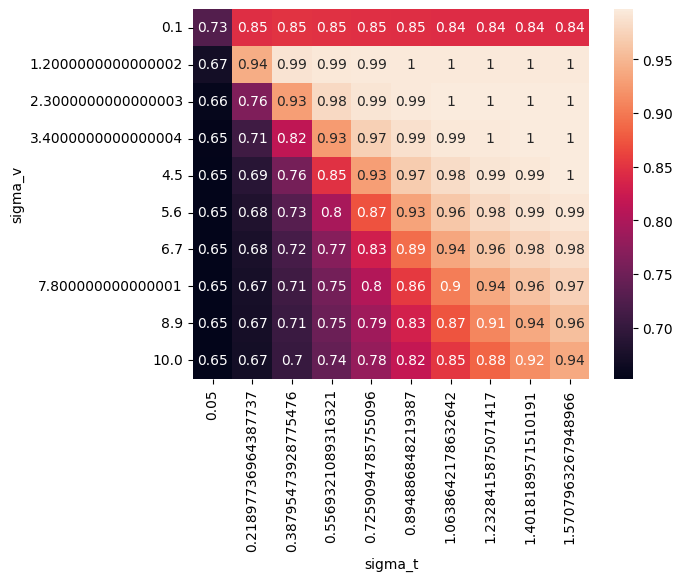

In [ ]:
correlations = correlations.astype(float)
sns.heatmap(correlations, annot=True)
plt.xlabel("sigma_t")
plt.ylabel("sigma_v")

plt.show()